<a href="https://colab.research.google.com/github/0Kyumy0/sales-predictions/blob/main/salesPredictionsML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import set_config
set_config(display='diagram')

In [2]:
filename = '/content/drive/MyDrive/DataScience/BasesDeDatos/sales_predictions.csv'

In [3]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.duplicated().sum() # there are no duplicates

0

In [7]:
df.isna().sum() # missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

This is a dataframe of the Items which have NaN value in their Item_Weight

In [8]:
df['Item_Weight'].isna().sum()

1463

In [9]:
df['Outlet_Size'].isna().sum()

2410

In [10]:
df.loc[(df['Item_Weight'].isna() == True)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


This is a dataframe of the Items which have NaN value in their Outlet_Size 

In [11]:
df.loc[(df['Outlet_Size'].isna() == True)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


Identify the objective (y) and the characteristics (X)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Notas:
* Numérico: Item-Visibility, Item_MRP
* Categórico: Item_Fat_Content, Item_Type
* Ordinal: Outlet_Size, Outlet_Location_Type, Outlet_Type

In [13]:
y = df['Item_Outlet_Sales']
X = df.drop(columns = ['Item_Outlet_Sales', 'Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,NaN,Tier 2,Supermarket Type1
...,...,...,...,...,...,...,...,...
5734,9.395,Regular,0.286345,Fruits and Vegetables,139.1838,NaN,Tier 3,Grocery Store
5191,15.600,Low Fat,0.117575,Frozen Foods,75.6670,NaN,Tier 2,Supermarket Type1
5390,17.600,Low Fat,0.018944,Health and Hygiene,237.3590,NaN,Tier 2,Supermarket Type1
860,20.350,low fat,0.054363,Snack Foods,117.9466,NaN,Tier 2,Supermarket Type1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
cat_selector = ['Item_Fat_Content', 'Item_Type']
num_selector = make_column_selector(dtype_include='float')
ordinal_selector = ['Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type']

In [17]:
valores_unicos_OLT = df['Outlet_Location_Type'].unique()

In [18]:
valores_unicos_ItemT = df['Item_Type'].unique()

In [19]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
# Scaler
scaler = StandardScaler()
# Ordinal encoder
ordinal_enco = OrdinalEncoder()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [20]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [21]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [22]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [23]:
ordinal_pipe = make_pipeline(ordinal_enco, median_imputer)
ordinal_pipe

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('simpleimputer', SimpleImputer(strategy='median'))])

In [24]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [25]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [26]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
ordinal_tuple = (ordinal_pipe, ordinal_selector)

In [27]:
# ColumnTransformer
preprocessor = make_column_transformer(ordinal_tuple, category_tuple, number_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder()),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Outlet_Location_Type', 'Outlet_Size',
                                  'Outlet_Type']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Fat_Content', 'Item_Type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f36d01f6d90>)])

In [28]:
# fit on train
preprocessor.fit(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder()),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Outlet_Location_Type', 'Outlet_Size',
                                  'Outlet_Type']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Fat_Content', 'Item_Type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f36d01f6d90>)])

In [29]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [30]:
# Comprueben los valores faltantes y que los datos se escalen y tengan una codificación one-hot
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 27)




array([[ 2.        ,  1.        ,  2.        , ...,  0.81724868,
        -0.71277507,  1.82810922],
       [ 2.        ,  1.        ,  2.        , ...,  0.5563395 ,
        -1.29105225,  0.60336888],
       [ 0.        ,  1.        ,  1.        , ..., -0.13151196,
         1.81331864,  0.24454056],
       ...,
       [ 1.        ,  1.        ,  1.        , ...,  1.11373638,
        -0.92052713,  1.52302674],
       [ 1.        ,  1.        ,  1.        , ...,  1.76600931,
        -0.2277552 , -0.38377708],
       [ 0.        ,  2.        ,  1.        , ...,  0.81724868,
        -0.95867683, -0.73836105]])

In [31]:
X_train_df = pd.DataFrame(X_train_processed)

In [32]:
X_train_df_names = X_train_df
X_train_df_names.columns = preprocessor.get_feature_names_out()
X_train_df_names

,pipeline-1__Outlet_Location_Type,pipeline-1__Outlet_Size,pipeline-1__Outlet_Type,pipeline-2__Item_Fat_Content_LF,pipeline-2__Item_Fat_Content_Low Fat,pipeline-2__Item_Fat_Content_Regular,pipeline-2__Item_Fat_Content_low fat,pipeline-2__Item_Fat_Content_reg,pipeline-2__Item_Type_Baking Goods,pipeline-2__Item_Type_Breads,...,pipeline-2__Item_Type_Household,pipeline-2__Item_Type_Meat,pipeline-2__Item_Type_Others,pipeline-2__Item_Type_Seafood,pipeline-2__Item_Type_Snack Foods,pipeline-2__Item_Type_Soft Drinks,pipeline-2__Item_Type_Starchy Foods,pipeline-3__Item_Weight,pipeline-3__Item_Visibility,pipeline-3__Item_MRP
0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.817249,-0.712775,1.828109
1,2.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.556340,-1.291052,0.603369
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.131512,1.813319,0.244541
3,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.169219,-1.004931,-0.952591
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.528819,-0.965484,-0.336460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.832409,4.309657,-0.044657
6388,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.639356,1.008625,-1.058907
6389,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.113736,-0.920527,1.523027
6390,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.766009,-0.227755,-0.383777


# Linear regression model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [34]:
reg = LinearRegression()
reg.fit(X_train_processed, y_train)

LinearRegression()

In [35]:
train_preds = reg.predict(X_train_processed)
test_preds = reg.predict(X_test_processed)

### Model performance based on R^2

In [36]:
lr_train_score = r2_score(y_train, train_preds)
lr_test_score = r2_score(y_test, test_preds)
print((lr_train_score*100).round(4))
print((lr_test_score*100).round(4))

50.7752
50.6977


It can be observed that the model achieved a 50% result for the test data in the R-squared score, which is an average percentage.

### Model performance based on RMSE (Root Mean Squared Error)

In [37]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train)
print(rmse_test)

1206.9737105804484
1166.2932020163669


There is an error of over a thousand in the test data, which is quite high, indicating that the model needs adjustments to minimize this number as much as possible.

# Regression tree model

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree.fit(X_train_processed, y_train)

# predictions based on the regression tree
train_preds_tree = dec_tree.predict(X_train_processed)
test_preds_tree = dec_tree.predict(X_test_processed)

r2_train2 = r2_score(y_train, train_preds_tree)
r2_test2 = r2_score(y_test, test_preds_tree)
print((r2_train2*100).round(4))
print((r2_test2*100).round(4))

100.0
13.1394


This is the model with the default data for the regression tree, which does not yield optimal results at all, showing extreme overfitting.





In [40]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [41]:
dec_tree.get_depth()

41

In [42]:
dec_tree.get_n_leaves()

6260

In [43]:
max_depth_range = list(range(2,41))

r2 = []
for depth in max_depth_range:
  dec_tree_test = DecisionTreeRegressor(max_depth = depth, random_state=42)
  dec_tree_test.fit(X_train_processed, y_train)
  dec_tree_test_score = dec_tree_test.score(X_test_processed, y_test)
  r2.append(dec_tree_test_score)

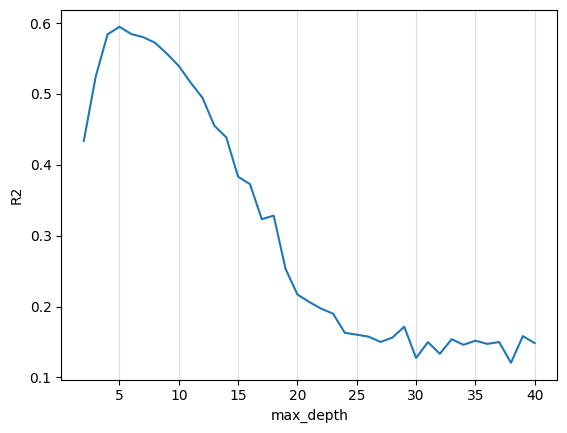

In [44]:
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth');
plt.ylabel('R2');
plt.grid(axis='x', alpha = 0.4);

In [45]:
r2_max = max(r2)
indice_r2_max = r2.index(r2_max)
valor_depht_final = max_depth_range[indice_r2_max]
print(valor_depht_final)
print(r2_max)

5
0.5947201327889511


### Model performance based on R^2

In [51]:
dec_5_tree = DecisionTreeRegressor(max_depth = 5, random_state=42)
dec_5_tree.fit(X_train_processed, y_train)

# predictions based on the regression tree
train_preds_tree = dec_5_tree.predict(X_train_processed)
test_preds_tree = dec_5_tree.predict(X_test_processed)

dec_5_train_score = dec_5_tree.score(X_train_processed, y_train)
dec_5_test_score = dec_5_tree.score(X_test_processed, y_test)
print((dec_5_train_score*100).round(4))
print((dec_5_test_score*100).round(4))

60.3932
59.472



According to the previous obtained graph, it is used that the best value for max_depth is 5, as it yields better results in the test R-squared.

### Model performance based on RMSE (Root Mean Squared Error)

In [47]:
rmse_train_tree = np.sqrt(mean_squared_error(y_train, train_preds_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, test_preds_tree))
print(rmse_train_tree)
print(rmse_test_tree)

1082.6572972836627
1057.4298789236952


Similarly, with the regression tree model, there is an error of slightly over a thousand in the test data, indicating that improvements are needed in the model.

# Which model is better according to the performance data?

El mejor modelo para poder cumplir con el objetivo principal dado es mediante el **árbol de regresión**. 

This is due to the improvement obtained in both performance tests, R-squared and RMSE.

* The fitting score increased by almost 10% in the test data, indicating a considerable fit for new data.
* Additionally, the margin of error in RMSE was significantly reduced (a reduction of 100).

However, it should be considered that the ideal scenario would be to have a higher increase in the fitting score, ideally around 35%. And reduce the margin of error close to zero.